<a href="https://colab.research.google.com/github/zyadalghamdi202/Colab/blob/main/Clustering_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phase 1: Data Loading and Initial Inspection**

In [ ]:
# Import necessary libraries for data manipulation, visualization, and clustering
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

**Phase 1 (cont.): Data Loading and Initial Inspection**

In [ ]:
# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/CC GENERAL.csv')
# Display the first 5 rows of the DataFrame to get an overview of the data
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Phase 1 (cont.): Data Loading and Initial Inspection**

In [ ]:
# Print the shape of the DataFrame (number of rows and columns)
print(df.shape)

(8950, 18)


**Phase 2: Data Preprocessing**

In [ ]:
# Check for missing values in each column of the DataFrame
df.isnull().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


**Phase 2 (cont.): Data Preprocessing**

In [ ]:
# Convert 'MINIMUM_PAYMENTS' column to numeric, coercing errors to NaN
df['MINIMUM_PAYMENTS'] = pd.to_numeric(df['MINIMUM_PAYMENTS'], errors='coerce')
# Fill missing values in 'MINIMUM_PAYMENTS' with the median of the column
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)
# Convert 'CREDIT_LIMIT' column to numeric, coercing errors to NaN
df['CREDIT_LIMIT'] = pd.to_numeric(df['CREDIT_LIMIT'], errors='coerce')
# Fill missing values in 'CREDIT_LIMIT' with the median of the column
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(), inplace=True)

**Phase 2 (cont.): Data Preprocessing**

In [ ]:
# Identify and print the names of categorical columns (object type)
cat_cols = df.select_dtypes(include=['object']).columns
print(cat_cols)
# Identify and print the names of integer columns (int64 type)
cat_cols = df.select_dtypes(include=['int64']).columns
print(cat_cols)

Index(['CUST_ID'], dtype='object')
Index(['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE'], dtype='object')


**Phase 3: Feature Engineering and Scaling**

In [ ]:
# Drop the 'CUST_ID' column as it is a unique identifier and not useful for clustering
df = df.drop('CUST_ID', axis=1)

# Initialize a StandardScaler to normalize the data
scaler = StandardScaler()
# Apply StandardScaler to specific columns and update the DataFrame with the scaled values
df[['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']] = scaler.fit_transform(df[['CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'TENURE']])

**Phase 3 (cont.): Feature Engineering and Scaling**

In [ ]:
# Generate descriptive statistics for the DataFrame, including count, mean, std, min, max, and quartiles
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8.950000e+03,8.950000e+03,8950.000000,8950.000000,8950.000000,8950.000000,8.950000e+03
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,-1.746585e-17,-1.905366e-17,4494.282473,1733.143852,844.906767,0.153715,2.921561e-16
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,1.000056e+00,1.000056e+00,3638.646702,2895.063757,2332.792322,0.292499,1.000056e+00
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.760698e-01,-5.917959e-01,50.000000,0.000000,0.019163,0.000000,-4.122768e+00
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,-4.760698e-01,-5.515646e-01,1600.000000,383.276166,170.857654,0.000000,3.606795e-01
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,-4.760698e-01,-3.101767e-01,3000.000000,856.901546,312.343947,0.000000,3.606795e-01
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,1.100739e-01,9.213645e-02,6500.000000,1901.134317,788.713501,0.142857,3.606795e-01
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,1.754785e+01,1.381101e+01,30000.000000,50721.483360,76406.207520,1.000000,3.606795e-01


**Phase 4: Outlier Handling**

In [ ]:
# Identify numerical columns (float64 and int64 types)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Loop through each numerical column to cap outliers using the IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25) # Calculate the first quartile (25th percentile)
    Q3 = df[col].quantile(0.75) # Calculate the third quartile (75th percentile)
    IQR = Q3 - Q1 # Calculate the Interquartile Range (IQR)
    lower_bound = Q1 - 1.5 * IQR # Calculate the lower bound for outlier detection
    upper_bound = Q3 + 1.5 * IQR # Calculate the upper bound for outlier detection
    # Replace values outside the bounds with the respective bound values
    df[col] = np.where(df[col] > upper_bound, upper_bound, np.where(df[col] < lower_bound, lower_bound, df[col]))

**Phase 5: Data Visualization (Distributions)**

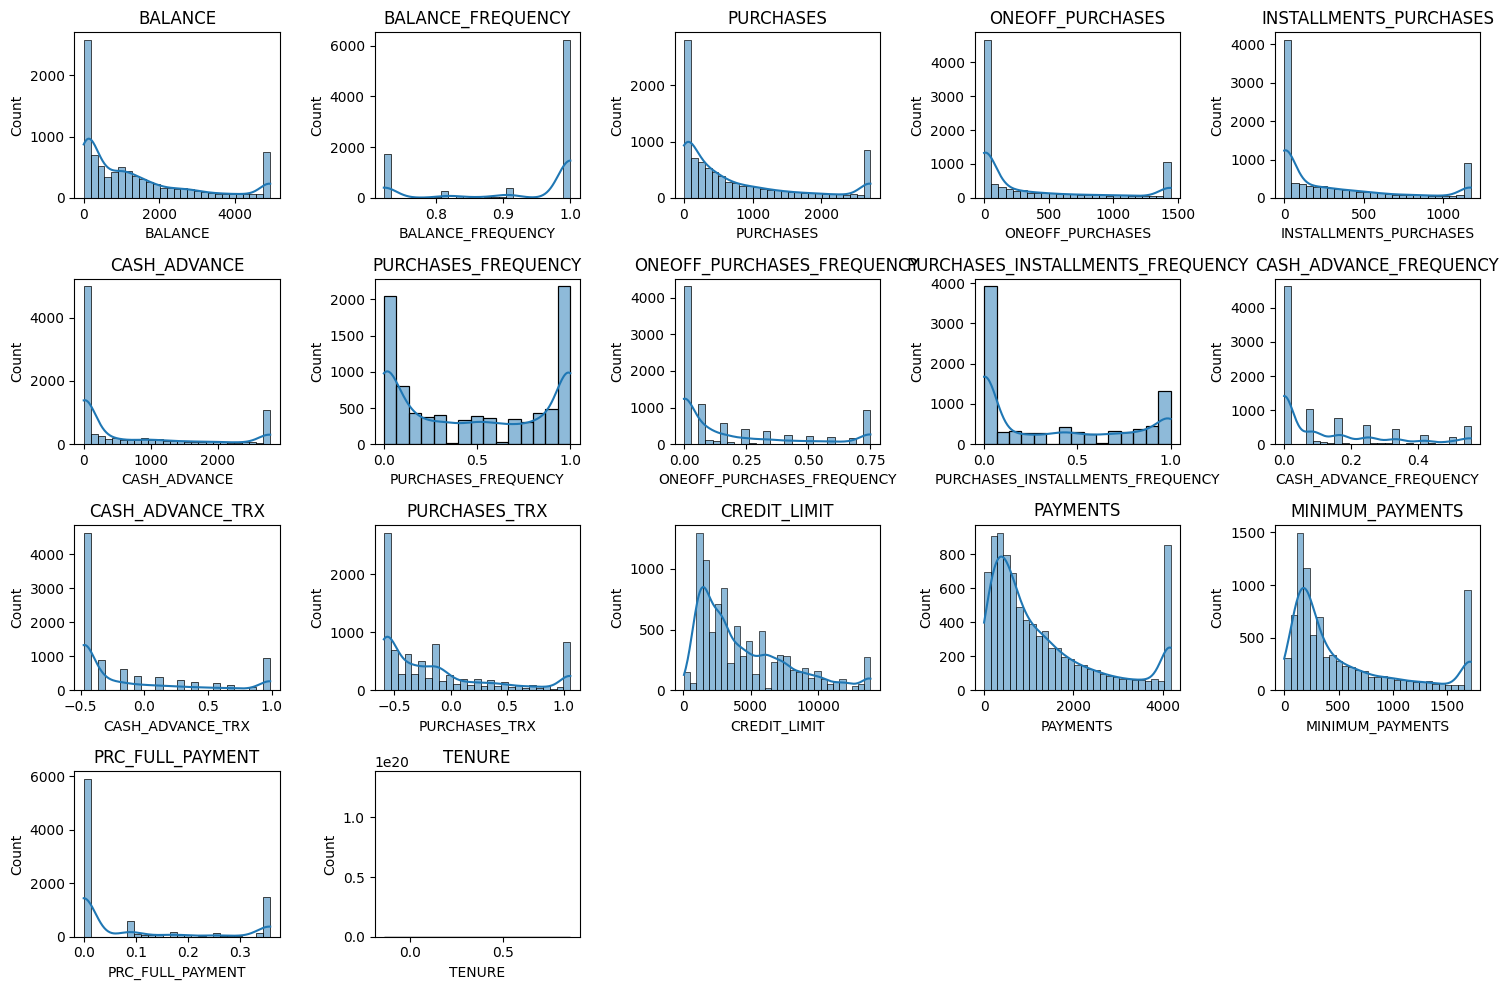

In [ ]:
# Set the figure size for the plots
plt.figure(figsize=(15, 10))
# Iterate through numerical columns and plot a histogram with KDE for each
for i, col in enumerate(num_cols):
    plt.subplot(4, 5, i + 1) # Create subplots in a 4x5 grid
    sns.histplot(data=df, x=col, kde=True) # Plot histogram with Kernel Density Estimate
    plt.title(col) # Set the title of the subplot to the column name

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # Display the plots

**Phase 6: Data Visualization (Boxplots)**

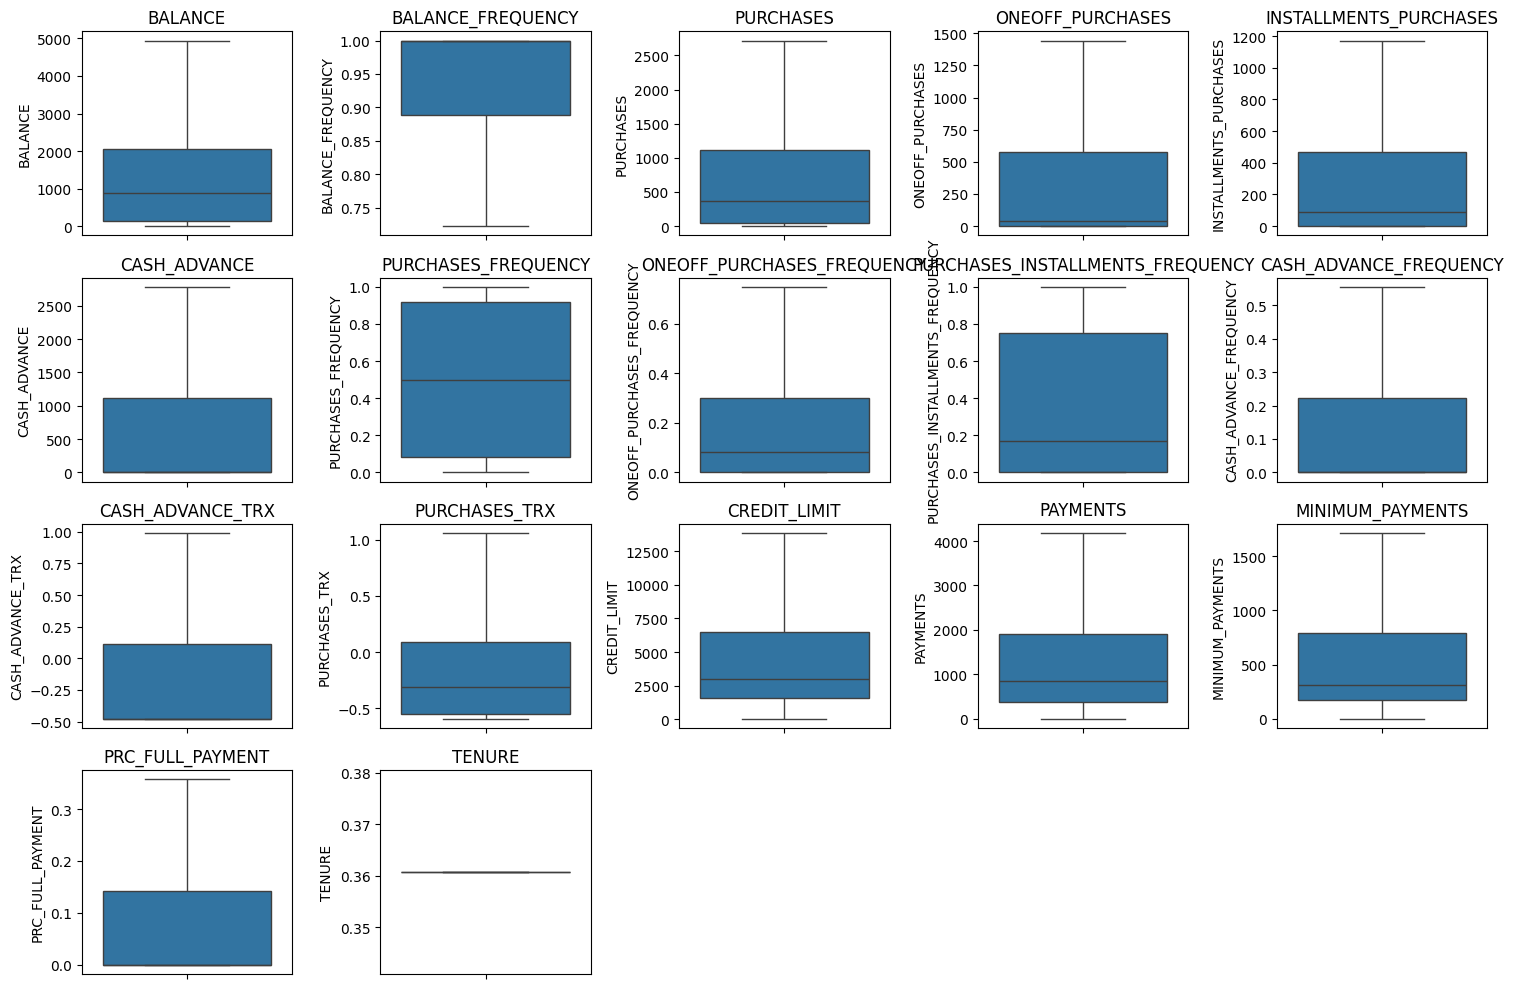

In [ ]:
# Set the figure size for the plots
plt.figure(figsize=(15, 10))
# Iterate through numerical columns and plot a boxplot for each
for i, col in enumerate(num_cols):
    plt.subplot(4, 5, i + 1) # Create subplots in a 4x5 grid
    sns.boxplot(data=df, y=col) # Plot boxplot
    plt.title(col) # Set the title of the subplot to the column name

plt.tight_layout() # Adjust layout to prevent overlapping titles/labels
plt.show() # Display the plots

**Phase 7: Determining Optimal Number of Clusters (Elbow Method)**

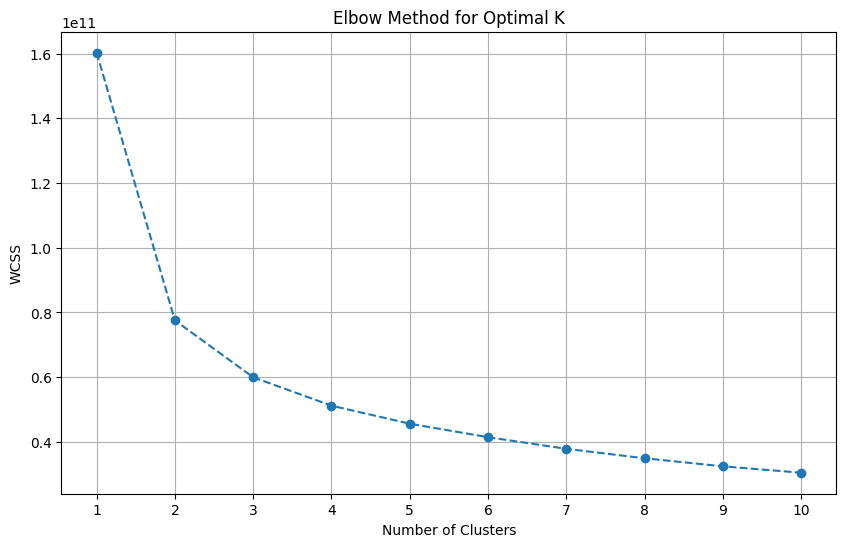

In [ ]:
# Initialize an empty list to store the Within-Cluster Sum of Squares (WCSS)
wcss = []
# Iterate from 1 to 10 clusters to calculate WCSS for each
for i in range(1, 11):
    # Initialize KMeans with the current number of clusters and a random state for reproducibility
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    # Fit KMeans to the data
    kmeans.fit(df)
    # Append the WCSS (inertia) to the list
    wcss.append(kmeans.inertia_)

# Set the figure size for the plot
plt.figure(figsize=(10, 6))
# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K') # Set the title of the plot
plt.xlabel('Number of Clusters') # Set the x-label
plt.ylabel('WCSS') # Set the y-label
plt.xticks(range(1, 11)) # Set the x-axis ticks
plt.grid(True) # Add a grid to the plot
plt.show() # Display the plot

**Phase 8: Determining Optimal Number of Clusters (Silhouette Score)**

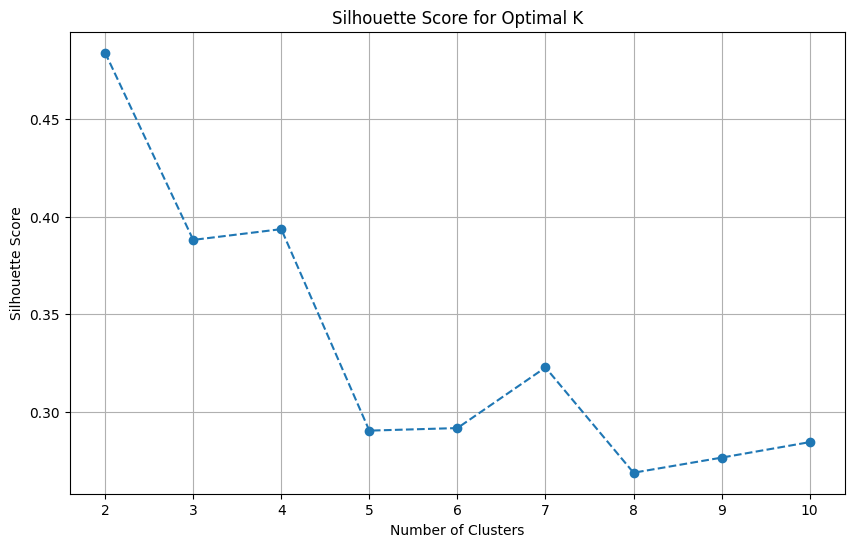

In [ ]:
# Initialize an empty list to store silhouette scores
silhouette_scores = []
# Iterate from 2 to 10 clusters to calculate the silhouette score for each
for i in range(2, 11):
    # Initialize KMeans with the current number of clusters and a random state for reproducibility
    kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
    # Fit KMeans to the data
    kmeans.fit(df)
    # Calculate the silhouette score and append it to the list
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

# Set the figure size for the plot
plt.figure(figsize=(10, 6))
# Plot the silhouette scores against the number of clusters
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score for Optimal K') # Set the title of the plot
plt.xlabel('Number of Clusters') # Set the x-label
plt.ylabel('Silhouette Score') # Set the y-label
plt.xticks(range(2, 11)) # Set the x-axis ticks
plt.grid(True) # Add a grid to the plot
plt.show() # Display the plot

**Phase 9: Hierarchical Clustering and Dendrogram**

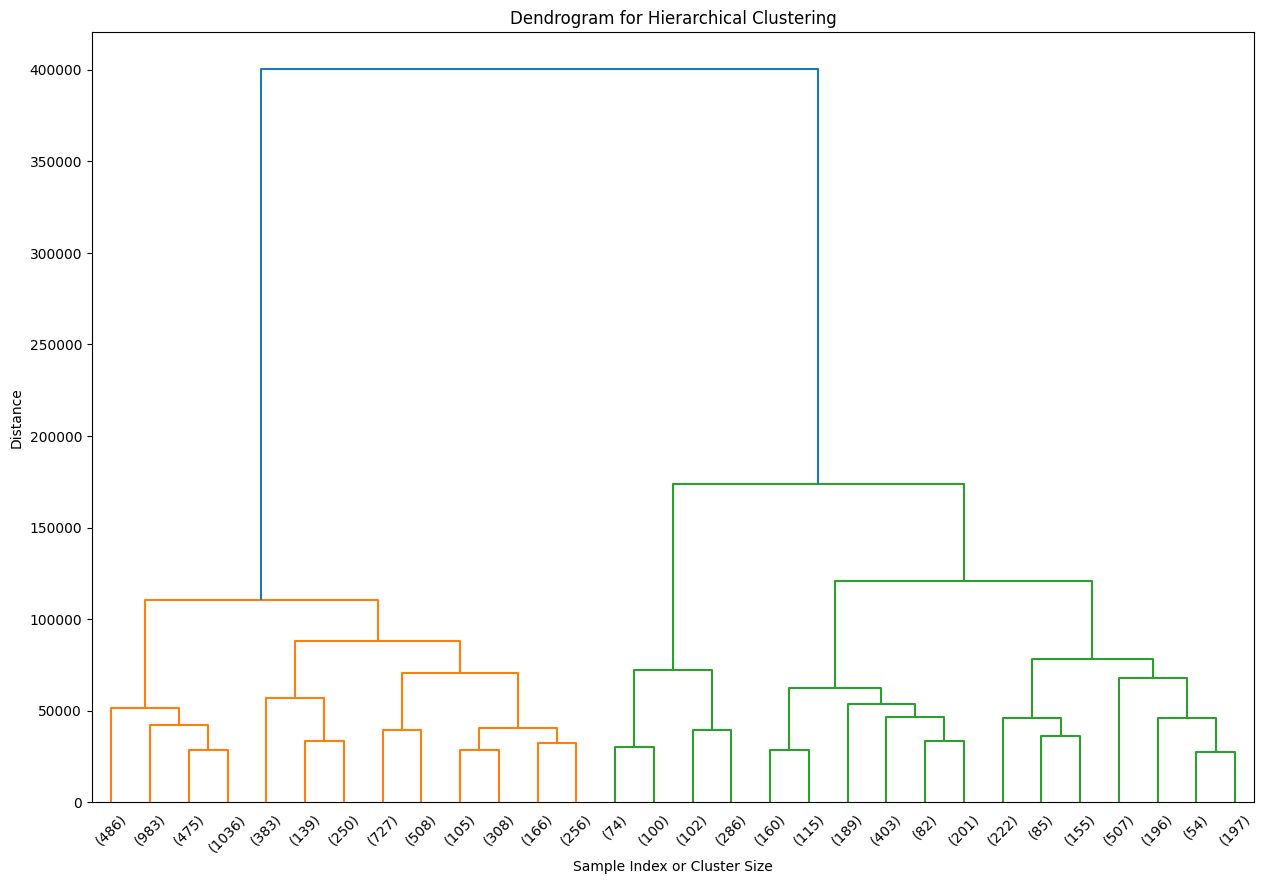

In [ ]:
# Perform hierarchical clustering using the 'ward' method
linkage_matrix = linkage(df, method='ward')

# Set the figure size for the dendrogram
plt.figure(figsize=(15, 10))
# Plot the dendrogram, truncating to show only the last 30 merged clusters
dendrogram(linkage_matrix, truncate_mode='lastp', p=30)
plt.title('Dendrogram for Hierarchical Clustering') # Set the title of the dendrogram
plt.xlabel('Sample Index or Cluster Size') # Set the x-label
plt.ylabel('Distance') # Set the y-label
plt.show() # Display the dendrogram

Analyzing the results from the Elbow Method, Silhouette Score, and Dendrogram. Based on the Elbow Method plot, there appears to be an elbow around 3 or 4 clusters. Based on the Silhouette Score plot, the highest score seems to be around 2 or 3 clusters. Based on the Dendrogram, cutting the dendrogram at a certain height suggests different numbers of clusters. Observing large vertical distances, 2 or 3 clusters seem plausible. Synthesizing the results: Both the Silhouette Score and Dendrogram suggest 2 or 3 clusters. The Elbow method also points towards 3 or 4 clusters. Considering all three methods, the optimal number of clusters appears to be 3.

**Phase 10: K-Means Clustering**

In [ ]:
# Apply K-Means clustering with the optimal number of clusters (3) as determined from previous analysis
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
# Fit KMeans to the data and predict the cluster labels for each data point, storing them in a new column
df['kmeans_labels'] = kmeans.fit_predict(df)

**Phase 11: DBSCAN Clustering**

In [ ]:
# Apply DBSCAN clustering
# Initialize DBSCAN with specified epsilon (eps) and minimum samples (min_samples)
# You might need to tune the eps and min_samples parameters based on your data
dbscan = DBSCAN(eps=0.5, min_samples=5)
# Fit DBSCAN to the data and predict the cluster labels, storing them in a new column
df['dbscan_labels'] = dbscan.fit_predict(df)

**Phase 12: Agglomerative Clustering**

In [ ]:
# Apply Agglomerative Hierarchical Clustering
# Initialize AgglomerativeClustering with the desired number of clusters (3)
agglomerative = AgglomerativeClustering(n_clusters=3)
# Fit Agglomerative Clustering to the data and predict the cluster labels, storing them in a new column
df['agglomerative_labels'] = agglomerative.fit_predict(df)

**Phase 13: Evaluating Clustering Results (Silhouette Score)**

In [ ]:
# Import the silhouette_score metric from scikit-learn
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for K-Means
try:
    # Calculate the silhouette score using the original data (excluding label columns) and the K-Means labels
    kmeans_silhouette = silhouette_score(df.drop(['kmeans_labels', 'dbscan_labels', 'agglomerative_labels'], axis=1), df['kmeans_labels'])
    # Print the K-Means Silhouette Score
    print(f"K-Means Silhouette Score: {kmeans_silhouette}")
except ValueError as e:
    # Handle cases where silhouette score cannot be calculated (e.g., only one cluster)
    print(f"Could not calculate K-Means Silhouette Score: {e}")


# Calculate Silhouette Score for DBSCAN
# DBSCAN can produce noise points (label -1), silhouette_score does not include these
# Only calculate if there are more than 1 cluster besides the noise cluster
unique_dbscan_labels = np.unique(df['dbscan_labels'])
if len(unique_dbscan_labels) > 1 and not (len(unique_dbscan_labels) == 2 and -1 in unique_dbscan_labels):
    try:
        # Calculate the silhouette score using the original data and the DBSCAN labels
        dbscan_silhouette = silhouette_score(df.drop(['kmeans_labels', 'dbscan_labels', 'agglomerative_labels'], axis=1), df['dbscan_labels'])
        # Print the DBSCAN Silhouette Score
        print(f"DBSCAN Silhouette Score: {dbscan_silhouette}")
    except ValueError as e:
        # Handle potential errors during calculation
        print(f"Could not calculate DBSCAN Silhouette Score: {e}")
else:
    # Print a message if DBSCAN did not form enough clusters to calculate the silhouette score
    print("DBSCAN did not form enough clusters (excluding noise) to calculate Silhouette Score.")


# Calculate Silhouette Score for Agglomerative Clustering
try:
    # Calculate the silhouette score using the original data and the Agglomerative Clustering labels
    agglomerative_silhouette = silhouette_score(df.drop(['kmeans_labels', 'dbscan_labels', 'agglomerative_labels'], axis=1), df['agglomerative_labels'])
    # Print the Agglomerative Clustering Silhouette Score
    print(f"Agglomerative Clustering Silhouette Score: {agglomerative_silhouette}")
except ValueError as e:
    # Handle cases where silhouette score cannot be calculated
    print(f"Could not calculate Agglomerative Clustering Silhouette Score: {e}")

K-Means Silhouette Score: 0.38807056444530474
DBSCAN did not form enough clusters (excluding noise) to calculate Silhouette Score.
Agglomerative Clustering Silhouette Score: 0.4147772463334817


**Phase 14: Visualizing Clustering Results**

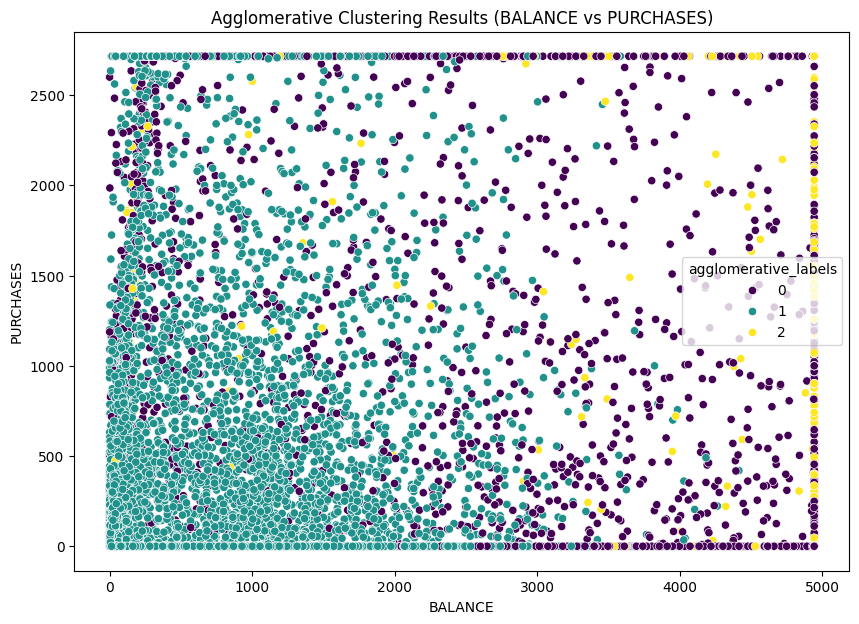

In [ ]:
# Visualize Agglomerative Clustering results using a scatter plot of two features
plt.figure(figsize=(10, 7)) # Set the figure size
# Create a scatter plot with 'BALANCE' on the x-axis and 'PURCHASES' on the y-axis,
# coloring the points based on the 'agglomerative_labels'
sns.scatterplot(x='BALANCE', y='PURCHASES', hue='agglomerative_labels', data=df, palette='viridis', legend='full')
plt.title('Agglomerative Clustering Results (BALANCE vs PURCHASES)') # Set the title of the plot
plt.xlabel('BALANCE') # Set the x-label
plt.ylabel('PURCHASES') # Set the y-label
plt.show() # Display the plot

**Phase 15: Analyzing Cluster Characteristics**

In [ ]:
# Analyze cluster characteristics by examining the mean values of features within each cluster
# Group the DataFrame by the 'agglomerative_labels' and calculate the mean for each feature in each cluster
cluster_means = df.groupby('agglomerative_labels').mean()
# Display the resulting DataFrame with cluster means
display(cluster_means)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,kmeans_labels,dbscan_labels
agglomerative_labels,,,,,,,,,,,,,,,,,,,
0,2248.478263,0.952906,1033.972744,520.572692,369.751726,1001.328073,0.538635,0.265144,0.379462,0.158622,-0.022128,0.012207,7257.934174,1908.986451,742.769230,0.085200,0.36068,0.242011,-1.000000
1,814.926571,0.919341,550.566012,250.124613,246.655267,463.008349,0.460270,0.136256,0.351323,0.104923,-0.194375,-0.209764,2361.184995,975.833462,419.082101,0.088446,0.36068,1.778427,-1.000000
2,3435.867596,0.961111,1314.799146,675.249680,463.218363,1340.844182,0.581506,0.320424,0.431692,0.196372,0.094429,0.140099,12776.868327,2627.476201,1133.615676,0.083790,0.36068,1.000000,-0.982206


**Cluster Analysis**

Based on the Agglomerative Clustering with 3 clusters, the following distinct customer segments are identified by examining the mean values of features for each cluster:

*   **Cluster 0:** This cluster represents customers with moderate balance, high balance frequency, and moderate purchase activity, including both one-off and installment purchases. They have a relatively high credit limit and make moderate payments.
*   **Cluster 1:** This cluster represents customers with lower balances, lower balance frequency, and lower overall purchase activity. They have lower credit limits and make lower payments compared to other clusters. This group might represent newer customers or those with lower spending habits.
*   **Cluster 2:** This cluster represents customers with the highest balances, very high balance frequency, and the highest purchase activity, including significant one-off and installment purchases. They have the highest credit limits and make the highest payments. This group likely represents high-spending, active credit card users.

In summary, the clusters appear to differentiate customers based on their spending habits, balance levels, and credit utilization. Cluster 2 represents high-value customers, Cluster 0 represents moderate-value customers, and Cluster 1 represents lower-value or newer customers.

**Phase 16: Dimensionality Reduction with PCA**

In [ ]:
# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2, random_state=42)
principal_components = pca.fit_transform(df.drop(['kmeans_labels', 'dbscan_labels', 'agglomerative_labels'], axis=1))

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2'])

**Phase 17: Visualizing Clusters in PCA Space**

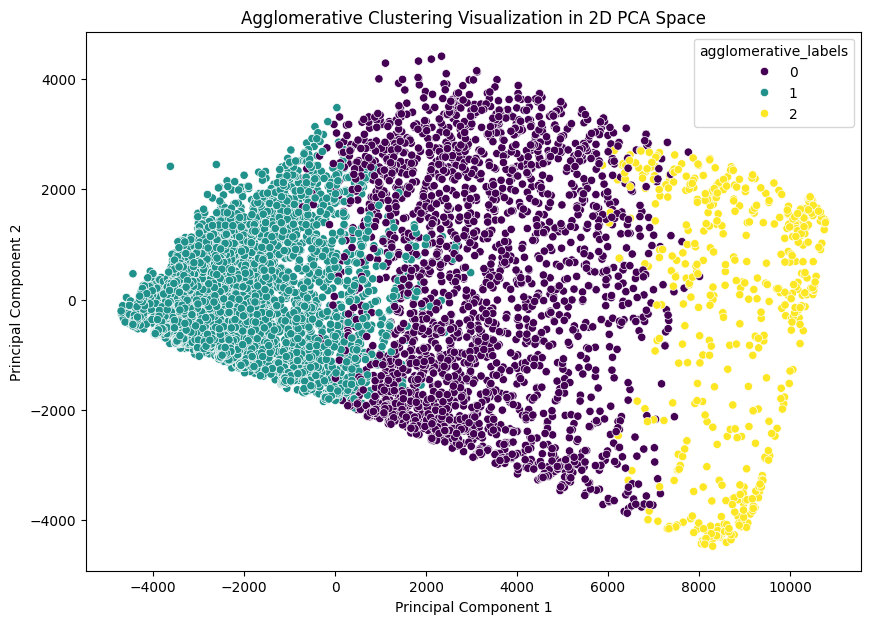

In [ ]:
# Add the agglomerative_labels to the pca_df for visualization
pca_df['agglomerative_labels'] = df['agglomerative_labels']

# Create a scatter plot of the two principal components, colored by agglomerative_labels
plt.figure(figsize=(10, 7))
sns.scatterplot(x='principal_component_1', y='principal_component_2', hue='agglomerative_labels', data=pca_df, palette='viridis', legend='full')
plt.title('Agglomerative Clustering Visualization in 2D PCA Space')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Phase 18: Interpreting PCA Components**

In [ ]:
# Access the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio of Principal Components:", explained_variance_ratio)

# Access the components (loadings)
components = pca.components_

# Create a DataFrame of the components
feature_names = df.drop(['kmeans_labels', 'dbscan_labels', 'agglomerative_labels'], axis=1).columns
components_df = pd.DataFrame(components, columns=feature_names, index=['Principal Component 1', 'Principal Component 2'])

# Display the components DataFrame
display(components_df)

Explained Variance Ratio of Principal Components: [0.71321176 0.12615459]


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Principal Component 1,0.254409,0.000005,0.089199,0.050147,0.023110,0.094234,0.000013,0.000022,0.000006,0.000010,0.00003,0.000040,0.936542,0.185267,0.062897,-5.002007e-07,9.657285e-20
Principal Component 2,0.769598,0.000023,-0.115263,-0.051984,-0.047766,0.448772,-0.000079,-0.000030,-0.000058,0.000072,0.00021,-0.000066,-0.294978,0.196860,0.249572,-4.115671e-05,-1.526028e-19


**PCA Summary**

The Principal Component Analysis reduced the data to two components. The first principal component explains approximately 71.3% of the variance in the data, while the second principal component explains about 12.6%. Examining the component loadings, the first principal component is heavily influenced by `CREDIT_LIMIT`, suggesting it captures the overall credit availability of customers. The second principal component has notable loadings on `BALANCE` and `CASH_ADVANCE`, indicating it relates to the balance amount and cash advance behavior.